In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#plot style
plt.style.use(['default', 'seaborn-ticks'])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [3]:
df = pd.read_csv("culled_data.csv.gz")
stats = pd.DataFrame()

In [4]:
df.columns

Index([u'line', u'delay', u'latitude', u'longitude', u'speed', u'time',
       u'vehicle', u'apparentTemperature', u'cloudCover', u'dewPoint',
       u'humidity', u'ozone', u'precipIntensity', u'precipProbability',
       u'precipType', u'pressure', u'temperature', u'uvIndex', u'visibility',
       u'windBearing', u'windGust', u'windSpeed', u'late', u'dayOfWeek',
       u'hourOfDay'],
      dtype='object')

In [5]:
#basic stats
mean_del = []
perc_late = []
perc_abit_late = []
perc_really_late = []
perc_ontime = []

stats['line'] = df.line.unique()

for line in stats.line:
    ln = df[df.line == line]
    mean_del.append(np.mean(ln.delay))
    on_time = len(ln[ln.late == 0])
    late = len(ln[ln.late == 1])
    abit_late = len(ln[ln.late == 1][ln.delay <= 60])
    really_late = len(ln[ln.late == 1][ln.delay >= 300])
    all_times = float(len(ln))
    perc_late.append(float(late) / all_times)
    perc_abit_late.append(float(abit_late) / all_times)
    perc_really_late.append(float(really_late) / all_times)
    perc_ontime.append(float(on_time) / all_times)
            
stats['mean_delay'] = mean_del
stats['percentage_late'] = perc_late
stats['percentage_ontime'] = perc_ontime
stats['percentage_abitlate'] = perc_abit_late
stats['percentage_really_late'] = perc_really_late

print(stats)

/Users/johanna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/johanna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


  line  mean_delay  percentage_late  percentage_ontime  percentage_abitlate  \
0  550   81.598477         0.724573           0.275427             0.319171   
1  94N   77.926086         0.732387           0.267613             0.239571   
2  731  227.141146         0.811797           0.188203             0.245606   
3   55  106.563301         0.826497           0.173503             0.247665   
4   83   87.668078         0.864038           0.135962             0.289101   

   percentage_really_late  
0                0.041331  
1                0.073741  
2                0.122791  
3                0.080313  
4                0.026430  


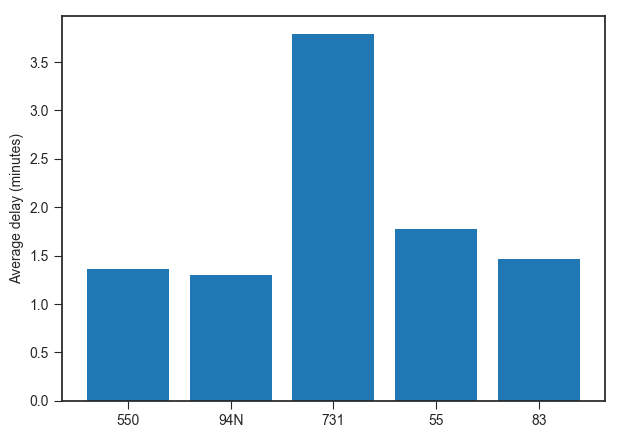

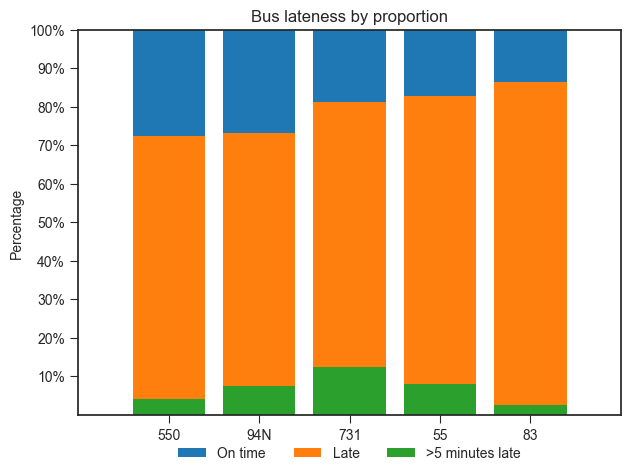

In [6]:
#plots!
#mean delay plot
plt.bar(range(5), stats.mean_delay / 60, align="center")
plt.xticks(np.arange(5), ('550', '94N', '731', '55', '83'))
plt.ylabel("Average delay (minutes)")
plt.show()

#percentage late/on time plot
plt.bar(range(5), stats.percentage_ontime, bottom=stats.percentage_late, align="center", label="On time")
plt.bar(range(5), stats.percentage_late, label="Late")
plt.bar(range(5), stats.percentage_really_late, label=">5 minutes late")
plt.axis([-1,5,0,1])
plt.title("Bus lateness by proportion")
plt.xticks(np.arange(5), ('550', '94N', '731', '55', '83'))
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], ['10%', '20%', '30%', '40%', '50%', '60%', '70%','80%','90%','100%'])
plt.ylabel("Percentage")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=3)
plt.show()

In [23]:
print(len(df) / 6)
print(df.dayOfWeek.unique())

56787
[2 3 4 5 6 0 1]


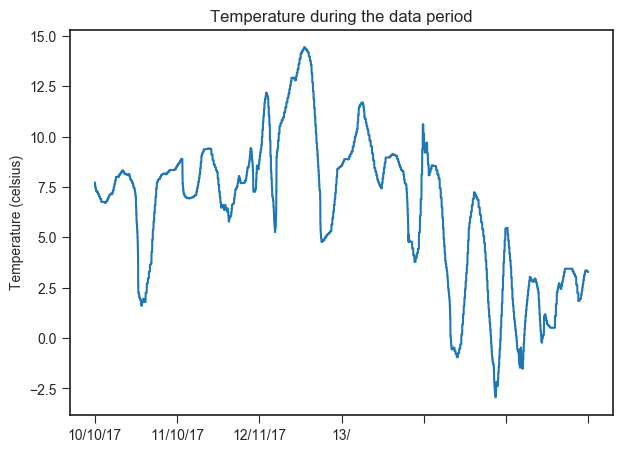

In [24]:
#weather stats
plt.plot(df.temperature)
plt.title("Temperature during the data period")
plt.ylabel("Temperature (celsius)")
plt.xticks(np.arange(0, len(df.temperature), 56787), ['10/10/17', '11/10/17', '12/11/17', '13/'])
plt.show()